<b>Name</b> : Sindhura Bagodu Ramachandra

<b>USC ID</b> : 4628596426

<b>Github username</b> : SindhuraBagodu

In [177]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import sklearn.metrics
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import SpectralClustering
from scipy.special import softmax
from sklearn import metrics
import warnings
import random

#### 1. Supervised, Semi-Supervised, and Unsupervised Learning

(a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes

In [158]:
attributes = ["radius","texture", "perimeter", "area","smoothness", "compactness", "concavity", "concave points","symmetry", "fractal dimension"]
measures = ["Mean", "Std_Error", "Worst"]
col = []

for s in measures :
    col_name = [k+" (" + s + ")" for k in attributes]
    col.extend(col_name)

col.insert(0,"Id")
col.insert(1,"Diagnosis")

df = pd.read_csv("../data/wdbc.data", names=col)

df.drop(columns=['Id'], inplace=True)
df.head()
print(df.shape)


(569, 31)


(b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs

In [159]:

def get_train_test_data():
    
    pos_df = df[df['Diagnosis'] == 'M']
    neg_df = df[df['Diagnosis'] == 'B']

    pos_train, pos_test = train_test_split(pos_df, train_size=0.8, random_state=random.randint(1,42))
    neg_train, neg_test = train_test_split(neg_df, train_size=0.8, random_state=random.randint(1,42))

    train_data = pd.concat([pos_train, neg_train])
    test_data = pd.concat([pos_test, neg_test])
    
    train_data = sklearn.utils.shuffle(train_data, random_state=random.randint(1,42))
    test_data = sklearn.utils.shuffle(test_data, random_state=random.randint(1,42))

    X_train = train_data.drop(columns=['Diagnosis'])
    y_train= train_data[['Diagnosis']]
    
    X_test = test_data.drop(columns=['Diagnosis'])
    y_test = test_data[['Diagnosis']]
    
    y_train['Diagnosis'] = y_train['Diagnosis'].apply(lambda x:1 if x=='M' else 0)
    y_test['Diagnosis'] = y_test['Diagnosis'].apply(lambda x:1 if x=='M' else 0)
    
    return X_train, X_test, y_train, y_test

# X_train, X_test, y_train, y_test = get_train_test_data()
# y_train


-----------------Current Iteration = 1 --------------------
Best C=  0.1
Train Accuracy =  0.9779735682819384
Train Precision =  0.9877300613496932
Train Recall score =  0.9526627218934911
Train F1 score =  0.9698795180722891
Train AUC =  0.972822589016921

Test Accuracy =  0.9826086956521739
Test Precision =  0.9767441860465116
Test Recall score =  0.9767441860465116
Test F1 score =  0.9767441860465116
Test AUC =  0.9814276485788114

-----------------Current Iteration = 2 --------------------
Best C=  0.1
Train Accuracy =  0.9889867841409692
Train Precision =  1.0
Train Recall score =  0.9704142011834319
Train F1 score =  0.9849849849849849
Train AUC =  0.985207100591716

Test Accuracy =  0.9739130434782609
Test Precision =  1.0
Test Recall score =  0.9302325581395349
Test F1 score =  0.963855421686747
Test AUC =  0.9651162790697674

-----------------Current Iteration = 3 --------------------
Best C=  0.1
Train Accuracy =  0.9889867841409692
Train Precision =  1.0
Train Recall score 


-----------------Current Iteration = 21 --------------------
Best C=  1
Train Accuracy =  0.9911894273127754
Train Precision =  0.9940119760479041
Train Recall score =  0.9822485207100592
Train F1 score =  0.988095238095238
Train AUC =  0.9893698743901174

Test Accuracy =  0.9826086956521739
Test Precision =  0.9767441860465116
Test Recall score =  0.9767441860465116
Test F1 score =  0.9767441860465116
Test AUC =  0.9814276485788114

-----------------Current Iteration = 22 --------------------
Best C=  0.1
Train Accuracy =  0.986784140969163
Train Precision =  0.9880239520958084
Train Recall score =  0.9763313609467456
Train F1 score =  0.9821428571428571
Train AUC =  0.9846569085435481

Test Accuracy =  0.991304347826087
Test Precision =  1.0
Test Recall score =  0.9767441860465116
Test F1 score =  0.988235294117647
Test AUC =  0.9883720930232558

-----------------Current Iteration = 23 --------------------
Best C=  1
Train Accuracy =  0.9911894273127754
Train Precision =  1.0
Train 

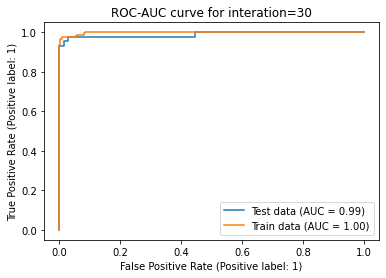

In [160]:
warnings.filterwarnings("ignore")

test_acc = []
train_acc = []

test_precisions = []
train_precisions = []

test_recalls = []
train_recalls= []

test_f1s = []
train_f1s=[]

test_aucs = []
train_aucs = []

param_grid_penalized = {'C': [10**c for c in range(-4,4, 1)]}


cv=StratifiedKFold(n_splits=5)
clf = LinearSVC(penalty="l1", dual=False, multi_class='ovr', max_iter= 3000)

model_plot = []
for i in range(1,31):
    X_train, X_test, y_train, y_test = get_train_test_data()
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)
    
    classifier_model = GridSearchCV(estimator = clf,param_grid = param_grid_penalized, cv=cv)
    classifier_model.fit(X_train_std, y_train)
    best_param = classifier_model.best_params_
    
    best_model = LinearSVC(penalty="l1", dual=False, multi_class='ovr', max_iter= 3000, C=best_param['C']).fit(X_train_std, y_train)
    
    y_pred_test = best_model.predict(X_test_std)
    y_pred_train = best_model.predict(X_train_std)    
    
    test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
    test_prec = metrics.precision_score(y_test, y_pred_test)
    test_f1 = metrics.f1_score(y_test, y_pred_test)
    test_recall = metrics.recall_score(y_test, y_pred_test)
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_pred_test)
    test_auc = metrics.auc(test_fpr, test_tpr)
    
    train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
    train_prec = metrics.precision_score(y_train, y_pred_train)
    train_f1 = metrics.f1_score(y_train, y_pred_train)
    train_recall = metrics.recall_score(y_train, y_pred_train)
    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_pred_train)
    train_auc = metrics.auc(train_fpr, train_tpr)
    
    test_acc.append(test_accuracy)
    train_acc.append(train_accuracy)

    test_precisions.append(test_prec)
    train_precisions.append(train_prec)

    test_recalls.append(test_recall)
    train_recalls.append(train_recall)

    test_f1s.append(test_f1)
    train_f1s.append(train_f1)

    test_aucs.append(test_auc)
    train_aucs.append(train_auc)
    
    print('\n-----------------Current Iteration = '+str(i)+' --------------------')
    print('Best C= ', best_param['C'])
    print('Train Accuracy = ', train_accuracy)
    print('Train Precision = ', train_prec)
    print('Train Recall score = ', train_recall)
    print('Train F1 score = ', train_f1)
    print('Train AUC = ', train_auc)
    
    print('\nTest Accuracy = ', test_accuracy)
    print('Test Precision = ', test_prec)
    print('Test Recall score = ', test_recall)
    print('Test F1 score = ', test_f1)
    print('Test AUC = ', test_auc)
    
    if i == 30:
        model_plot.append(best_model)
        train_matrix = metrics.confusion_matrix(y_train, y_pred_train)
        test_matrix = metrics.confusion_matrix(y_test, y_pred_test)
        
        print('\nConfusion Matrix for Train set')
        print(train_matrix)
        print('Confusion Matrix for Test set')
        print(test_matrix)        
        
        ax = plt.gca()
        test_curve=metrics.plot_roc_curve(best_model, X_test_std, y_test, ax=ax, name='Test data')
        train_curve=metrics.plot_roc_curve(best_model, X_train_std, y_train, ax=ax, name='Train data')
        plt.title("ROC-AUC curve for interation=30")
        plt.show()
        
        
    

In [161]:
#avarage scores

print('\n-----------------Train Dataset--------------------')
print('Average Accuracy = ', np.mean(train_acc))
print('Average Precision = ', np.mean(train_precisions))
print('Average Recall score = ', np.mean(train_recalls))
print('Average F1 score = ', np.mean(train_f1s))
print('Average AUC = ', np.mean(train_aucs))

print('\n-----------------Test Dataset--------------------')
print('Average Accuracy = ', np.mean(test_acc))
print('Average Precision = ', np.mean(test_precisions))
print('Average Recall score = ', np.mean(test_recalls))
print('Average F1 score = ', np.mean(test_f1s))
print('Average AUC = ', np.mean(test_aucs))


-----------------Train Dataset--------------------
Average Accuracy =  0.9858296622613805
Average Precision =  0.9905591667262803
Average Recall score =  0.9712031558185401
Average F1 score =  0.9807628705713085
Average AUC =  0.9828530398975744

-----------------Test Dataset--------------------
Average Accuracy =  0.9701449275362319
Average Precision =  0.9804811840931397
Average Recall score =  0.9395348837209302
Average F1 score =  0.9589035197233042
Average AUC =  0.9639804048234282


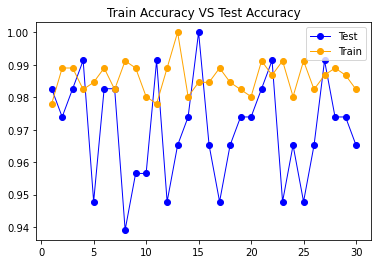

In [162]:
iterations=[i for i in range(1,31)]

plt.plot(iterations, test_acc, 'o-', linewidth=1, color='blue', label = 'Test')
plt.plot(iterations, train_acc, 'o-', linewidth=1, color='orange', label = 'Train')
plt.title("Train Accuracy VS Test Accuracy")
plt.legend()
plt.show()


ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.


-----------------Current Iteration = 1 --------------------
Best C=  0.1
Train Accuracy =  0.9801762114537445
Train Precision =  0.9819277108433735
Train Recall score =  0.9644970414201184
Train F1 score =  0.973134328358209
Train AUC =  0.9769853628153223

Test Accuracy =  0.9739130434782609
Test Precision =  0.9761904761904762
Test Recall score =  0.9534883720930233
Test F1 score =  0.9647058823529412
Test AUC =  0.9697997416020673

-----------------Current Iteration = 2 --------------------
Best C=  1
Train Accuracy =  0.9713656387665198
Train Precision =  0.9588235294117647
Train Recall score =  0.9644970414201184
Train F1 score =  0.9616519174041299
Train AUC =  0.9699678189556733

Test Accuracy =  0.9652173913043478
Test Precision =  0.9333333333333333
Test Recall score =  0.9767441860465116
Test F1 score =  0.9545454545454545
Test AUC =  0.9675387596899225

-----------------Current Iteration = 3 --------------------
Best C=  0.1
Train Accuracy =  0.9669603524229075
Train Precis


-----------------Current Iteration = 20 --------------------
Best C=  1
Train Accuracy =  0.9845814977973568
Train Precision =  0.9764705882352941
Train Recall score =  0.9822485207100592
Train F1 score =  0.9793510324483775
Train AUC =  0.9841067164953804

Test Accuracy =  0.9826086956521739
Test Precision =  1.0
Test Recall score =  0.9534883720930233
Test F1 score =  0.9761904761904763
Test AUC =  0.9767441860465116

-----------------Current Iteration = 21 --------------------
Best C=  100
Train Accuracy =  0.9845814977973568
Train Precision =  0.9879518072289156
Train Recall score =  0.9704142011834319
Train F1 score =  0.9791044776119403
Train AUC =  0.9816983286618914

Test Accuracy =  0.9739130434782609
Test Precision =  0.9761904761904762
Test Recall score =  0.9534883720930233
Test F1 score =  0.9647058823529412
Test AUC =  0.9697997416020673

-----------------Current Iteration = 22 --------------------
Best C=  10
Train Accuracy =  0.9669603524229075
Train Precision =  0.927

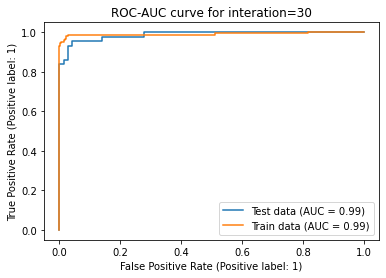

In [163]:
test_acc_ssl = []
train_acc_ssl = []

test_precisions_ssl = []
train_precisions_ssl = []

test_recalls_ssl = []
train_recalls_ssl = []

test_f1s_ssl = []
train_f1s_ssl =[]

test_aucs_ssl = []
train_aucs_ssl = []

param_grid_penalized = {'C': [10**c for c in range(-4,4, 1)]}
cv=StratifiedKFold(n_splits=5)
clf = LinearSVC(penalty="l1", dual=False, multi_class='ovr', max_iter= 3000)

for i in range(1,31):
    X_train, X_test, y_train, y_test = get_train_test_data()
    df_train = pd.concat([X_train, y_train], axis=1)
    
    df_train_pos = df_train[df_train['Diagnosis'] == 1]
    df_train_neg = df_train[df_train['Diagnosis'] == 0]
    
    X_label_pos, X_unl_pos, y_label_pos, y_unl_pos = train_test_split(df_train_pos.drop(columns=['Diagnosis']), df_train_pos['Diagnosis'], test_size=0.5, random_state=random.randint(1,42))
    X_label_neg, X_unl_neg, y_label_neg, y_unl_neg = train_test_split(df_train_neg.drop(columns=['Diagnosis']), df_train_neg['Diagnosis'], test_size=0.5, random_state=random.randint(1,42))
    
    X_train_labelled = pd.concat([X_label_pos, X_label_neg], ignore_index=True)
    X_train_unlabelled = pd.concat([X_unl_pos, X_unl_neg], ignore_index=True)
    
    y_train_labelled = pd.concat([y_label_pos, y_label_neg], ignore_index=True)
    y_train_unlabelled = pd.concat([y_unl_pos, y_unl_neg], ignore_index=True)
    
    
    scaler = preprocessing.StandardScaler().fit(X_train_labelled)
    X_train_labelled = scaler.transform(X_train_labelled)
    X_train_unlabelled = scaler.transform(X_train_unlabelled)
    X_test_std = scaler.transform(X_test)
    
    
    classifier_model = GridSearchCV(estimator = clf,param_grid = param_grid_penalized, cv=cv)
    classifier_model.fit(X_train_labelled, y_train_labelled)
    best_param = classifier_model.best_params_    
    best_model = LinearSVC(penalty="l1", dual=False, multi_class='ovr', max_iter= 3000, C=best_param['C']).fit(X_train_labelled, y_train_labelled)
    
    total =  X_train_unlabelled.shape[0]
    for k in range(total):
        max_datapoint = None
        max_index = None
        max_dist = -float('inf')
        for inx,datapoint in enumerate(X_train_unlabelled):
            y_i = best_model.decision_function(datapoint.reshape(1, -1))
            w_norm = np.linalg.norm(best_model.coef_)
            dist = y_i / w_norm
            if dist > max_dist:
                max_datapoint = datapoint
                max_index=inx
                max_dist = dist
        
        y_pred_datapoint = best_model.predict(max_datapoint.reshape(1, -1))
        X_train_labelled = np.append(X_train_labelled, max_datapoint.reshape(1, -1), axis=0)
        y_train_labelled = np.append(y_train_labelled,y_pred_datapoint)
        X_train_unlabelled= np.delete(X_train_unlabelled, max_index, axis=0)        
        best_model = LinearSVC(penalty="l1", dual=False, multi_class='ovr', max_iter= 3000, C=best_param['C']).fit(X_train_labelled, y_train_labelled)
    
    y_pred_test = best_model.predict(X_test_std)
    y_pred_train = best_model.predict(scaler.transform(X_train))    
    
    test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
    test_prec = metrics.precision_score(y_test, y_pred_test)
    test_f1 = metrics.f1_score(y_test, y_pred_test)
    test_recall = metrics.recall_score(y_test, y_pred_test)
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_pred_test)
    test_auc = metrics.auc(test_fpr, test_tpr)
    
    train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
    train_prec = metrics.precision_score(y_train, y_pred_train)
    train_f1 = metrics.f1_score(y_train, y_pred_train)
    train_recall = metrics.recall_score(y_train, y_pred_train)
    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_pred_train)
    train_auc = metrics.auc(train_fpr, train_tpr)
    
    test_acc_ssl.append(test_accuracy)
    train_acc_ssl.append(train_accuracy)

    test_precisions_ssl.append(test_prec)
    train_precisions_ssl.append(train_prec)

    test_recalls_ssl.append(test_recall)
    train_recalls_ssl.append(train_recall)

    test_f1s_ssl.append(test_f1)
    train_f1s_ssl.append(train_f1)

    test_aucs_ssl.append(test_auc)
    train_aucs_ssl.append(train_auc)
    
    print('\n-----------------Current Iteration = '+str(i)+' --------------------')
    print('Best C= ', best_param['C'])
    print('Train Accuracy = ', train_accuracy)
    print('Train Precision = ', train_prec)
    print('Train Recall score = ', train_recall)
    print('Train F1 score = ', train_f1)
    print('Train AUC = ', train_auc)
    
    print('\nTest Accuracy = ', test_accuracy)
    print('Test Precision = ', test_prec)
    print('Test Recall score = ', test_recall)
    print('Test F1 score = ', test_f1)
    print('Test AUC = ', test_auc)
    
    if i == 30:
        model_plot.append(best_model)
        train_matrix = metrics.confusion_matrix(y_train, y_pred_train)
        test_matrix = metrics.confusion_matrix(y_test, y_pred_test)
        
        print('\nConfusion Matrix for Train set')
        print(train_matrix)
        print('Confusion Matrix for Test set')
        print(test_matrix)
        
        
        ax = plt.gca()
        test_curve=metrics.plot_roc_curve(best_model, X_test_std, y_test, ax=ax, name='Test data')
        train_curve=metrics.plot_roc_curve(best_model, scaler.transform(X_train), y_train, ax=ax, name='Train data')
        plt.title("ROC-AUC curve for interation=30")
        plt.show()          
            
         

In [164]:
#avarage scores

print('\n-----------------Train Dataset--------------------')
print('Average Accuracy = ', np.mean(train_acc_ssl))
print('Average Precision = ', np.mean(train_precisions_ssl))
print('Average Recall score = ', np.mean(train_recalls_ssl))
print('Average F1 score = ', np.mean(train_f1s_ssl))
print('Average AUC = ', np.mean(train_aucs_ssl))

print('\n-----------------Test Dataset--------------------')
print('Average Accuracy = ', np.mean(test_acc_ssl))
print('Average Precision = ', np.mean(test_precisions_ssl))
print('Average Recall score = ', np.mean(test_recalls_ssl))
print('Average F1 score = ', np.mean(test_f1s_ssl))
print('Average AUC = ', np.mean(test_aucs_ssl))


-----------------Train Dataset--------------------
Average Accuracy =  0.9744493392070486
Average Precision =  0.9639403796628299
Average Recall score =  0.9684418145956606
Average F1 score =  0.9659249790112272
Average AUC =  0.9732267552510468

-----------------Test Dataset--------------------
Average Accuracy =  0.9643478260869567
Average Precision =  0.9635679788636397
Average Recall score =  0.9418604651162792
Average F1 score =  0.9519323062220851
Average AUC =  0.9598191214470283


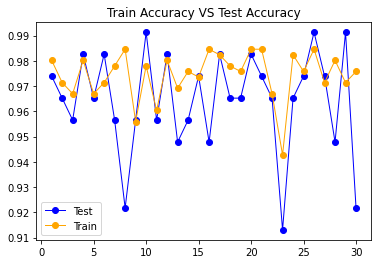

In [165]:
iterations=[i for i in range(1,31)]

plt.plot(iterations, test_acc_ssl, 'o-', linewidth=1, color='blue', label = 'Test')
plt.plot(iterations, train_acc_ssl, 'o-', linewidth=1, color='orange', label = 'Train')
plt.title("Train Accuracy VS Test Accuracy")
plt.legend()
plt.show()


##### iii. Unsupervised Learning: 

Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

To make sure that the algorithm is not trapped in a local minima, we will run the algorithm multiple times using different random initializations, and take the optimum. Also, max_iter is set to a higher value.


-----------------Current Iteration = 1 --------------------
Train Accuracy =  0.9074889867841409
Train Precision =  0.9379310344827586
Train Recall score =  0.8047337278106509
Train F1 score =  0.8662420382165604
Train AUC =  0.8865773902211149

Test Accuracy =  0.06956521739130435
Test Precision =  0.05555555555555555
Test Recall score =  0.09302325581395349
Test F1 score =  0.06956521739130433
Test AUC =  0.07428940568475453

-----------------Current Iteration = 2 --------------------
Train Accuracy =  0.9118942731277533
Train Precision =  0.9271523178807947
Train Recall score =  0.8284023668639053
Train F1 score =  0.8749999999999999
Train AUC =  0.8949029378179176

Test Accuracy =  0.08695652173913043
Test Precision =  0.10256410256410256
Test Recall score =  0.18604651162790697
Test F1 score =  0.1322314049586777
Test AUC =  0.10691214470284238

-----------------Current Iteration = 3 --------------------
Train Accuracy =  0.9185022026431718
Train Precision =  0.9647887323943662
T


-----------------Current Iteration = 22 --------------------
Train Accuracy =  0.8920704845814978
Train Precision =  0.9054054054054054
Train Recall score =  0.7928994082840237
Train F1 score =  0.8454258675078865
Train AUC =  0.8718883006332399

Test Accuracy =  0.06086956521739131
Test Precision =  0.0547945205479452
Test Recall score =  0.09302325581395349
Test F1 score =  0.06896551724137931
Test AUC =  0.06734496124031006

-----------------Current Iteration = 23 --------------------
Train Accuracy =  0.9074889867841409
Train Precision =  0.9261744966442953
Train Recall score =  0.8165680473372781
Train F1 score =  0.8679245283018868
Train AUC =  0.888985778054604

Test Accuracy =  0.9391304347826087
Test Precision =  0.9285714285714286
Test Recall score =  0.9069767441860465
Test F1 score =  0.9176470588235294
Test AUC =  0.9326550387596899

-----------------Current Iteration = 24 --------------------
Train Accuracy =  0.9251101321585903
Train Precision =  0.9655172413793104
Trai

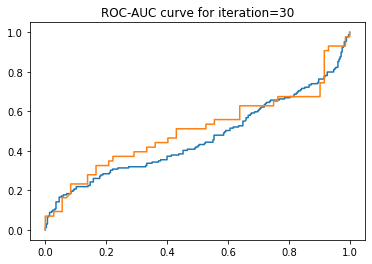

In [166]:
test_acc_unspr = []
train_acc_unspr = []

test_precisions_unspr = []
train_precisions_unspr = []

test_recalls_unspr = []
train_recalls_unspr = []

test_f1s_unspr = []
train_f1s_unspr =[]

test_aucs_unspr = []
train_aucs_unspr = []

for n in range(1,31):
    X_train, X_test, y_train, y_test = get_train_test_data()
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)
    
    kmeans = KMeans(n_clusters=2, random_state=random.randint(1,42), max_iter=1000)
    kmeans.fit(X_train_std)
    cluster_labels=kmeans.labels_
    
    centers = kmeans.cluster_centers_
    nn_model = NearestNeighbors(n_neighbors=30).fit(X_train_std)
    
    y_pred_train = [-1 for _ in range(len(y_train))]

    for c in range(2):
        distances, indices = nn_model.kneighbors(centers[c].reshape(1,-1))
        true_labels = [y_train.iloc[i]['Diagnosis'] for i in indices[0].tolist()]
        
        if sum(true_labels) >= 15:
            class_label = 1
        else:
            class_label = 0
            
        for i in range(len(y_train)):
            if cluster_labels[i] == c:
                y_pred_train[i] = class_label
                
                
    y_pred_test = kmeans.predict(X_test_std)
    
    test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
    test_prec = metrics.precision_score(y_test, y_pred_test)
    test_f1 = metrics.f1_score(y_test, y_pred_test)
    test_recall = metrics.recall_score(y_test, y_pred_test)
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_pred_test)
    test_auc = metrics.auc(test_fpr, test_tpr)
    
    train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
    train_prec = metrics.precision_score(y_train, y_pred_train)
    train_f1 = metrics.f1_score(y_train, y_pred_train)
    train_recall = metrics.recall_score(y_train, y_pred_train)
    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_pred_train)
    train_auc = metrics.auc(train_fpr, train_tpr)
    
    test_acc_unspr.append(test_accuracy)
    train_acc_unspr.append(train_accuracy)

    test_precisions_unspr.append(test_prec)
    train_precisions_unspr.append(train_prec)

    test_recalls_unspr.append(test_recall)
    train_recalls_unspr.append(train_recall)

    test_f1s_unspr.append(test_f1)
    train_f1s_unspr.append(train_f1)

    test_aucs_unspr.append(test_auc)
    train_aucs_unspr.append(train_auc)
    
    print('\n-----------------Current Iteration = '+str(n)+' --------------------')
    print('Train Accuracy = ', train_accuracy)
    print('Train Precision = ', train_prec)
    print('Train Recall score = ', train_recall)
    print('Train F1 score = ', train_f1)
    print('Train AUC = ', train_auc)
    
    print('\nTest Accuracy = ', test_accuracy)
    print('Test Precision = ', test_prec)
    print('Test Recall score = ', test_recall)
    print('Test F1 score = ', test_f1)
    print('Test AUC = ', test_auc)
    
    if n == 30:
        
        train_matrix = metrics.confusion_matrix(y_train, y_pred_train)
        test_matrix = metrics.confusion_matrix(y_test, y_pred_test)
        
        print('\nConfusion Matrix for Train set')
        print(train_matrix)
        print('Confusion Matrix for Test set')
        print(test_matrix)
        
        X_train_dist = kmeans.transform(X_train_std)**2
        X_test_dist = kmeans.transform(X_test_std)**2
        
        df_dist_train = pd.DataFrame(X_train_dist.sum(axis=1).round(2), columns=['sqdist'])
        df_dist_test = pd.DataFrame(X_test_dist.sum(axis=1).round(2), columns=['sqdist'])
        
        X_train_score = softmax(df_dist_train.to_numpy())
        X_test_score = softmax(df_dist_test.to_numpy())       
       
        
        ax = plt.gca()
        train_fpr, train_tpr, thresholds = metrics.roc_curve(y_train, X_train_score)
        test_fpr, test_tpr, thresholds = metrics.roc_curve(y_test, X_test_score)
        plt.plot(train_fpr,train_tpr, label = "Train Data")
        plt.plot(test_fpr,test_tpr, label = "Test Data")
        plt.title("ROC-AUC curve for iteration=30")
        plt.show()
    
        
        

In [167]:
#avarage scores

print('\n-----------------Train Dataset--------------------')
print('Average Accuracy = ', np.mean(train_acc_unspr))
print('Average Precision = ', np.mean(train_precisions_unspr))
print('Average Recall score = ', np.mean(train_recalls_unspr))
print('Average F1 score = ', np.mean(train_f1s_unspr))
print('Average AUC = ', np.mean(train_aucs_unspr))

print('\n-----------------Test Dataset--------------------')
print('Average Accuracy = ', np.mean(test_acc_unspr))
print('Average Precision = ', np.mean(test_precisions_unspr))
print('Average Recall score = ', np.mean(test_recalls_unspr))
print('Average F1 score = ', np.mean(test_f1s_unspr))
print('Average AUC = ', np.mean(test_aucs_unspr))


-----------------Train Dataset--------------------
Average Accuracy =  0.9075624082232012
Average Precision =  0.9227667501953996
Average Recall score =  0.8209072978303747
Average F1 score =  0.8686674686773198
Average AUC =  0.8899273331257137

-----------------Test Dataset--------------------
Average Accuracy =  0.6092753623188406
Average Precision =  0.6110187699674594
Average Recall score =  0.596124031007752
Average F1 score =  0.5994367366280003
Average AUC =  0.6066268303186908


##### iv. Spectral Clustering: 

Repeat 1(b)iii using spectral clustering, which is clustering based on kernels.3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.



-----------------Current Iteration = 1 --------------------
Train Accuracy =  0.09691629955947137
Train Precision =  0.11987381703470032
Train Recall score =  0.22485207100591717
Train F1 score =  0.15637860082304528
Train AUC =  0.12295235129243225

Test Accuracy =  0.9565217391304348
Test Precision =  0.975
Test Recall score =  0.9069767441860465
Test F1 score =  0.9397590361445783
Test AUC =  0.9465439276485788

-----------------Current Iteration = 2 --------------------
Train Accuracy =  0.9052863436123348
Train Precision =  0.9846153846153847
Train Recall score =  0.757396449704142
Train F1 score =  0.8561872909698998
Train AUC =  0.8751894529222464

Test Accuracy =  0.06086956521739131
Test Precision =  0.0547945205479452
Test Recall score =  0.09302325581395349
Test F1 score =  0.06896551724137931
Test AUC =  0.06734496124031006

-----------------Current Iteration = 3 --------------------
Train Accuracy =  0.9140969162995595
Train Precision =  0.9710144927536232
Train Recall sc


-----------------Current Iteration = 22 --------------------
Train Accuracy =  0.07709251101321586
Train Precision =  0.10443037974683544
Train Recall score =  0.1952662721893491
Train F1 score =  0.1360824742268041
Train AUC =  0.10114190802449913

Test Accuracy =  0.9043478260869565
Test Precision =  0.9705882352941176
Test Recall score =  0.7674418604651163
Test F1 score =  0.8571428571428571
Test AUC =  0.8767764857881137

-----------------Current Iteration = 23 --------------------
Train Accuracy =  0.08149779735682819
Train Precision =  0.10759493670886076
Train Recall score =  0.20118343195266272
Train F1 score =  0.1402061855670103
Train AUC =  0.10585487387106822

Test Accuracy =  0.0782608695652174
Test Precision =  0.1111111111111111
Test Recall score =  0.20930232558139536
Test F1 score =  0.14516129032258066
Test AUC =  0.10465116279069768

-----------------Current Iteration = 24 --------------------
Train Accuracy =  0.920704845814978
Train Precision =  0.992592592592592

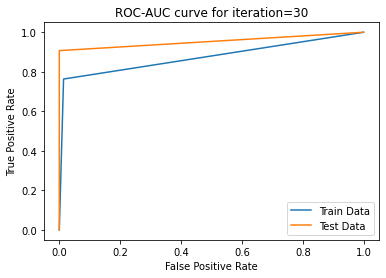

In [168]:
test_acc_spect = []
train_acc_spect = []

test_precisions_spect = []
train_precisions_spect = []

test_recalls_spect = []
train_recalls_spect = []

test_f1s_spect = []
train_f1s_spect =[]

test_aucs_spect = []
train_aucs_spect = []

for n in range(1,31):
    X_train, X_test, y_train, y_test = get_train_test_data()
    
    scaler = preprocessing.MinMaxScaler().fit(X_train)
    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)
    
    spectral = SpectralClustering(n_clusters = 2, affinity ='rbf',gamma=1, assign_labels='discretize')
    
    y_pred_train= spectral.fit_predict(X_train_std)    
    y_pred_test = spectral.fit_predict(X_test_std)
    
    
    test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
    test_prec = metrics.precision_score(y_test, y_pred_test)
    test_f1 = metrics.f1_score(y_test, y_pred_test)
    test_recall = metrics.recall_score(y_test, y_pred_test)
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_pred_test)
    test_auc = metrics.auc(test_fpr, test_tpr)
    
    train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
    train_prec = metrics.precision_score(y_train, y_pred_train)
    train_f1 = metrics.f1_score(y_train, y_pred_train)
    train_recall = metrics.recall_score(y_train, y_pred_train)
    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_pred_train)
    train_auc = metrics.auc(train_fpr, train_tpr)
    
    test_acc_spect.append(test_accuracy)
    train_acc_spect.append(train_accuracy)

    test_precisions_spect.append(test_prec)
    train_precisions_spect.append(train_prec)

    test_recalls_spect.append(test_recall)
    train_recalls_spect.append(train_recall)

    test_f1s_spect.append(test_f1)
    train_f1s_spect.append(train_f1)

    test_aucs_spect.append(test_auc)
    train_aucs_spect.append(train_auc)
    
    print('\n-----------------Current Iteration = '+str(n)+' --------------------')
    print('Train Accuracy = ', train_accuracy)
    print('Train Precision = ', train_prec)
    print('Train Recall score = ', train_recall)
    print('Train F1 score = ', train_f1)
    print('Train AUC = ', train_auc)
    
    print('\nTest Accuracy = ', test_accuracy)
    print('Test Precision = ', test_prec)
    print('Test Recall score = ', test_recall)
    print('Test F1 score = ', test_f1)
    print('Test AUC = ', test_auc)
    
    if n == 30:
        
        train_matrix = metrics.confusion_matrix(y_train, y_pred_train)
        test_matrix = metrics.confusion_matrix(y_test, y_pred_test)
        
        print('\nConfusion Matrix for Train set')
        print(train_matrix)
        print('Confusion Matrix for Test set')
        print(test_matrix)

        train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_pred_train)
        test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_pred_test)
        roc_auc_train = metrics.auc(train_fpr, train_tpr)
        roc_auc_test = metrics.auc(test_fpr, test_tpr)
        display_train = metrics.RocCurveDisplay(fpr=train_fpr, tpr=train_tpr, roc_auc=roc_auc_train, estimator_name='train estimator')
        display_test = metrics.RocCurveDisplay(fpr=test_fpr, tpr=test_tpr, roc_auc=roc_auc_test, estimator_name='test estimator')
       
        
        ax = plt.gca()
        display_train.plot(ax=ax,label = "Train Data")
        display_test.plot(ax=ax,label = "Test Data")
        plt.title("ROC-AUC curve for iteration=30")
        plt.show()

In [169]:
print('\n-----------------Train Dataset--------------------')
print('Average Accuracy = ', np.mean(train_acc_spect))
print('Average Precision = ', np.mean(train_precisions_spect))
print('Average Recall score = ', np.mean(train_recalls_spect))
print('Average F1 score = ', np.mean(train_f1s_spect))
print('Average AUC = ', np.mean(train_aucs_spect))

print('\n-----------------Test Dataset--------------------')
print('Average Accuracy = ', np.mean(test_acc_spect))
print('Average Precision = ', np.mean(test_precisions_spect))
print('Average Recall score = ', np.mean(test_recalls_spect))
print('Average F1 score = ', np.mean(test_f1s_spect))
print('Average AUC = ', np.mean(test_aucs_spect))


-----------------Train Dataset--------------------
Average Accuracy =  0.6401615271659324
Average Precision =  0.6915302868841215
Average Recall score =  0.6011834319526628
Average F1 score =  0.6343323665027297
Average AUC =  0.6322291428769162

-----------------Test Dataset--------------------
Average Accuracy =  0.6542028985507247
Average Precision =  0.7133665013197223
Average Recall score =  0.5782945736434109
Average F1 score =  0.6193750635187205
Average AUC =  0.6389158053402239


v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods

#### TRAIN DATA

|Avg Metric|Supervised Learning|Semisupervised Learning|Unsupervised Learning|Spectral Clustering|
|---|---|---|---|---|
|Accuracy|9858 |0.9744|0.90756|0.64016|
|Precision|0.99056 |0.9639 |0.9227|0.69153|
|Recall|0.9712 |0.96844 |0.82091|0.60118|
|F1 Score|0.98076|0.9659 |0.86867|0.6343|
|AUC Score|0.98285|0.9732|0.8899|0.6322|

#### TEST DATA

|Avg Metric|Supervised Learning|Semisupervised Learning|Unsupervised Learning|Spectral Clustering|
|---|---|---|---|---|
|Accuracy|0.9701 |0.9643 |0.60927|0.6542|
|Precision|0.98048|0.9636 |0.6110|0.7133|
|Recall|0.9395|0.94186| 0.5961|0.57829|
|F1 Score|0.9589|0.9519 |0.5994|0.61937|
|AUC Score|0.96398|0.9598 |0.6066|0.6389|

* Supervised learning performs much better than Unsupervised learning and slightly better than Semisupervised learning.
* Semisupervised learning performs better than Unsupervised learning.
* Spectral clustering performs comparatively similar to Unsupervised learning


#### 2. Active Learning Using Support Vector Machines


(a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [170]:
bank_note_df = pd.read_csv('../data/data_banknote_authentication.txt', names=["variance", "skewness", "curtosis", "entropy", "class"])

shuffled = bank_note_df.sample(frac=1).reset_index()

shuffled.drop(columns=['index'], inplace=True)
bank_note_df['class'] = bank_note_df['class'].astype('int')

train_data = shuffled[:900]
test_data = shuffled[900:]

print('Train data size = ', train_data.shape)
print('Test data size = ', test_data.shape)


Train data size =  (900, 5)
Test data size =  (472, 5)


(b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the
test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning

In [171]:
complete_test_errors = []

param_grid_penalized = {'C': [10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
cv=StratifiedKFold(n_splits=5)
clf = LinearSVC(penalty="l1", dual=False, max_iter= 3000)

for n in range(1,51):
    svm_test_erros = []

    train_data_copy = train_data.copy()
    num_arr = []
    for _ in range(90):
        df_sample_10 = train_data_copy.sample(n=10)
        train_data_copy.drop(df_sample_10.index, inplace=True)
        num_arr = num_arr + df_sample_10.values.tolist()
        
        df_curr = pd.DataFrame(data=num_arr, columns = ["variance", "skewness", "curtosis", "entropy", "class"])

        X_train_passive = df_curr.drop(columns=['class'])
        y_train_passive = df_curr['class']

        passive_learning_model = GridSearchCV(estimator = clf,param_grid = param_grid_penalized, cv=cv)
        passive_learning_model.fit(X_train_passive, y_train_passive)
        best_param = classifier_model.best_params_

        best_model = LinearSVC(penalty="l1", dual=False, max_iter= 3000, C=best_param['C']).fit(X_train_passive, y_train_passive)

        y_pred_test = best_model.predict(test_data.drop(columns=['class']))
        
        test_accuracy = metrics.accuracy_score(test_data['class'], y_pred_test)
        test_error=1-test_accuracy
        svm_test_erros.append(test_error)
     
    complete_test_errors.append(svm_test_erros)


In [172]:
temp = np.array(complete_test_errors)
test_errors_avg_passive = np.mean(temp, axis=0)
test_errors_avg_passive

array([0.08877119, 0.04368644, 0.03      , 0.02733051, 0.02394068,
       0.02072034, 0.0184322 , 0.01792373, 0.0165678 , 0.0175    ,
       0.01716102, 0.01495763, 0.01491525, 0.01542373, 0.01381356,
       0.01385593, 0.01402542, 0.01423729, 0.01436441, 0.01440678,
       0.01415254, 0.01389831, 0.01389831, 0.01364407, 0.01355932,
       0.01338983, 0.01317797, 0.01317797, 0.01347458, 0.01317797,
       0.01351695, 0.01364407, 0.01326271, 0.01283898, 0.01224576,
       0.01216102, 0.01211864, 0.01207627, 0.01216102, 0.01224576,
       0.01228814, 0.01228814, 0.01254237, 0.01233051, 0.01216102,
       0.01220339, 0.01228814, 0.01241525, 0.01207627, 0.01207627,
       0.01211864, 0.01199153, 0.01190678, 0.01182203, 0.01173729,
       0.0115678 , 0.01169492, 0.01177966, 0.01194915, 0.01211864,
       0.01211864, 0.0120339 , 0.01207627, 0.01211864, 0.01211864,
       0.01220339, 0.01211864, 0.01220339, 0.01241525, 0.01216102,
       0.01211864, 0.01211864, 0.01165254, 0.01186441, 0.01152

ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training
set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [173]:
def closestN(clf, X_array, n):
    # array of sample distances to the hyperplane
    dists = clf.decision_function(X_array)
    # absolute distance to hyperplane
    absdists = np.abs(dists)

    return absdists.argsort()[:n]

complete_test_errors_active = []

param_grid_penalized = {'C': [10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
cv=StratifiedKFold(n_splits=5)
clf = LinearSVC(penalty="l1", dual=False,  max_iter= 3000)

for n in range(1,51):
    svm_test_erros_active = []

    train_data_copy = train_data.copy()
    num_arr_active = []
    
    active_sample_10 = train_data_copy.sample(n=10)
    
    while active_sample_10['class'].nunique() == 1:
        active_sample_10 = train_data_copy.sample(n = 10)
        
    train_data_copy.drop(active_sample_10.index, inplace=True)
    
    train_data_copy = train_data_copy.reset_index().drop(columns=['index'])
    active_sample_10 = active_sample_10.reset_index().drop(columns=['index'])
    
    X_train_active = active_sample_10.drop(columns=['class'])
    y_train_active = active_sample_10['class']

    active_learning_model = GridSearchCV(estimator = clf,param_grid = param_grid_penalized, cv=cv)
    active_learning_model.fit(X_train_active, y_train_active)
    best_param = active_learning_model.best_params_

    best_model = LinearSVC(penalty="l1", dual=False, max_iter= 3000, C=best_param['C']).fit(X_train_passive, y_train_passive)

    y_pred_test = best_model.predict(test_data.drop(columns=['class']))

    test_accuracy = metrics.accuracy_score(test_data['class'], y_pred_test)
    test_error=1-test_accuracy
    svm_test_erros_active.append(test_error)  
    
        
    for _ in range(89):      
        closest_samples = closestN(best_model, train_data_copy.drop(columns=['class']), 10)
        closest_datapoints = train_data_copy.iloc[closest_samples]
        
        active_sample_10 = pd.concat([active_sample_10, closest_datapoints])
        train_data_copy.drop(closest_datapoints.index, axis=0, inplace=True)
        
        X_train_active = active_sample_10.drop(columns=['class'])
        y_train_active = active_sample_10['class']
        
        active_learning_model = GridSearchCV(estimator = clf,param_grid = param_grid_penalized, cv=cv)
        active_learning_model.fit(X_train_active, y_train_active)
        
        best_param = active_learning_model.best_params_
        best_model = LinearSVC(penalty="l1", dual=False,  max_iter= 3000, C=best_param['C']).fit(X_train_passive, y_train_passive)

        y_pred_test = best_model.predict(test_data.drop(columns=['class']))        
        test_accuracy = metrics.accuracy_score(test_data['class'], y_pred_test)
        test_error=1-test_accuracy
        
        svm_test_erros_active.append(test_error)
    
#     avg_test_error = sum(svm_test_erros_active) / len(svm_test_erros_active)
#     print('Iteration = '+str(n)+'  Average Test error = '+str(avg_test_error))
    complete_test_errors_active.append(svm_test_erros_active)



In [174]:
temp = np.array(complete_test_errors_active)
test_errors_avg_active = np.mean(temp, axis=0)
test_errors_avg_active

array([0.02033898, 0.01245763, 0.01182203, 0.01372881, 0.0140678 ,
       0.01279661, 0.01313559, 0.01364407, 0.01330508, 0.01338983,
       0.01271186, 0.0109322 , 0.01101695, 0.01084746, 0.01084746,
       0.01076271, 0.01084746, 0.01076271, 0.01084746, 0.01110169,
       0.01110169, 0.01127119, 0.01118644, 0.01135593, 0.01110169,
       0.0109322 , 0.01076271, 0.01101695, 0.01135593, 0.01135593,
       0.01084746, 0.01084746, 0.01084746, 0.01067797, 0.01067797,
       0.01059322, 0.01059322, 0.01067797, 0.01076271, 0.0109322 ,
       0.01084746, 0.0109322 , 0.01076271, 0.01059322, 0.01059322,
       0.01084746, 0.01144068, 0.01194915, 0.01245763, 0.01254237,
       0.01194915, 0.01144068, 0.01177966, 0.01110169, 0.01101695,
       0.01237288, 0.01330508, 0.01279661, 0.01194915, 0.01262712,
       0.01220339, 0.01144068, 0.01135593, 0.01131356, 0.01169492,
       0.01262712, 0.0129661 , 0.01389831, 0.01440678, 0.01529661,
       0.01563559, 0.01559322, 0.01529661, 0.01491525, 0.01483

(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive
learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation

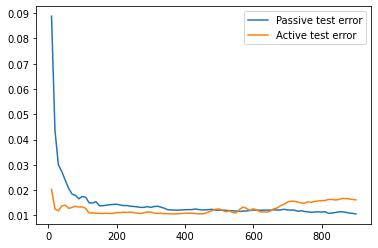

In [175]:
n = [i for i in range(10, 910, 10)]
plt.plot(n, test_errors_avg_passive, label = "Passive test error")
plt.plot(n, test_errors_avg_active, label = "Active test error")
plt.legend()
plt.show()

##### References

* https://stackoverflow.com/questions/41443118/select-5-data-points-closest-to-svm-hyperlane
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
* https://stackoverflow.com/questions/32074239/sklearn-getting-distance-of-each-point-from-decision-boundary
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors